Data Collection

In [ ]:
import tweepy as tw
import pandas as pd

In [ ]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''


In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)
search_words = "#आईपीएल"
date_since = "2010-11-16"
new_search = search_words + " -filter:retweets"


In [ ]:
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(500)
d=[tweet.full_text for tweet in tweets]

In [ ]:
search_words = "#कांग्रेस"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(600)
e=[tweet.full_text for tweet in tweets]


In [ ]:
search_words = "#कोरोना"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(600)
f=[tweet.full_text for tweet in tweets]

In [ ]:
search_words = "#बीजेपी"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(700)
g=[tweet.full_text for tweet in tweets]

In [ ]:
search_words = "#मोदी"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(600)
h=[tweet.full_text for tweet in tweets]

In [ ]:
t=d+e+f+g+h


In [ ]:
tw=[]
for tweets in t:
  tw.append(tweets)


In [ ]:
tw

Data preprocessing

In [666]:
import pandas as pd
import numpy as np
import itertools as it
import spacy
from spacy.lang.hi import Hindi
import regex as re
nlp_hi = Hindi()

In [667]:
extended_stop_words = ['जी','श्री','|','l','श्रीमती', 'RT']
for stopword in extended_stop_words:
    lexeme = nlp_hi.vocab[stopword]
    lexeme.is_stop = True

In [668]:
def preprocessing_hi(text_hi):
  tweet_hi = []
  tokenized_text = nlp_hi(text_hi)
  for token in tokenized_text:
    if(token.text!='\n\n'
        and not token.is_stop
        and not token.is_punct
        and not token.is_space
        and not token.like_email
        and not token.is_digit
        and not token.is_quote
        and (re.search(r'@\S+',token.text) is None)
        and not token.like_url):
      tweet_hi.append(token.text)


  tweet = ' '.join([token  for token in tweet_hi])
  return tweet

In [669]:
df=pd.read_csv("tweetSet1500.csv")
x=df['Tweets'].tolist()

In [670]:
len(x)

1500

In [671]:
p=[]
for tweets in x:
  p.append(preprocessing_hi(tweets))

In [672]:
! pip install demoji
import demoji
pt=[]
for tweet in p:
  tweet=tweet.replace('\\n','')
  tweet=tweet.replace('#','')
  tweet=demoji.replace(tweet,'')
  pt.append(tweet)


In [673]:
len(pt)

1500

In [674]:
import pandas as pd
import codecs
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [675]:
data = pd.read_csv("HindiSentiWordnet.txt", delimiter=' ')
fields = ['POS_TAG', 'ID', 'POS', 'NEG', 'LIST_OF_WORDS']



In [676]:
words_dict = {}
for i in data.index:
    words = data[fields[4]][i].split(',')
    for word in words:
        if data[fields[2]][i]== data[fields[3]][i]:
          words_dict[word] = (data[fields[0]][i], data[fields[2]][i], data[fields[3]][i], True)
        else:
          words_dict[word] = (data[fields[0]][i], data[fields[2]][i], data[fields[3]][i], False)

In [677]:
data_votes = pd.read_csv("SentimentWords.csv")
fields_votes = [ 'LIST_OF_WORDS','POS', 'NEG']

In [678]:
#last col is newly created - neutral
words_dict_votes = {}
for i in data_votes.index:
    words = data_votes[fields_votes[0]][i].split(',')
    for word in words:
        if data_votes[fields_votes[2]][i]== data_votes[fields_votes[1]][i]:
          words_dict_votes[word] = (data_votes[fields_votes[1]][i], data_votes[fields_votes[2]][i], True)
        else:
          words_dict_votes[word] =  (data_votes[fields_votes[1]][i], data_votes[fields_votes[2]][i] ,True)


In [ ]:
words_dict_votes

Algorithms

In [680]:
def sentiment(text):
    words = word_tokenize(text)
    pos_polarity = 0
    neg_polarity = 0
    allowed_words = ['a','v','r','n']#adverbs, nouns, adjective, verb
    for word in words:
        if word in words_dict:
            pos_tag, pos, neg, neu = words_dict[word]
            if pos_tag in allowed_words:
                if pos > neg:
                    pos_polarity += pos
                elif neg > pos:
                    neg_polarity += neg
    polarity=pos_polarity-neg_polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [681]:
s=[]
for i in pt:
  s.append(sentiment(i))

In [682]:
import pandas as pd
dict={'tweets':pt,'sentiment':s}
df2 = pd.DataFrame(dict)


In [683]:
df2.head()

,tweets,sentiment
0,देश बड़ी बकवास नाउम्मीद निराशा Rafool NakliGan...,negative
1,हा लोगो शौक चढ़ा सिलेंडर रखने बीजेपी सिलेंडर इ...,neutral
2,बात बोल हु आने चुनाव लोगो समझना होगा AAP बस वो...,negative
3,"आरक्षण विरोधी हूं किंतु वोट बीजेपी दूंगा, आरक्...",neutral
4,राहुल बीजेपी,neutral


In [684]:
df2 = df2.rename(columns={"tweets" : "Preprocessed_Tweets"})
df = df.rename(columns={"Tweets" : "Original_Tweets"})
df5 = pd.concat([df[["Original_Tweets"]], df2["Preprocessed_Tweets"]], axis=1)
df5.head(10)

,Original_Tweets,Preprocessed_Tweets
0,['@AkhileshPSingh @RahulGandhi देश की सबसे बड़...,देश बड़ी बकवास नाउम्मीद निराशा Rafool NakliGan...
1,'@Abhiemanyu @Ishutyagi91 हा लोगो को #शौक चढ़...,हा लोगो शौक चढ़ा सिलेंडर रखने बीजेपी सिलेंडर इ...
2,'एक बात बोल रहा हु आने वाले चुनाव में लोगो को...,बात बोल हु आने चुनाव लोगो समझना होगा AAP बस वो...
3,'मैं #आरक्षण विरोधी हूं किंतु वोट #बीजेपी को ...,"आरक्षण विरोधी हूं किंतु वोट बीजेपी दूंगा, आरक्..."
4,"'@INCMP 😂😂😂 राहुल हैं तो #बीजेपी है।',",राहुल बीजेपी
5,'#ModiResignOrRepeal #बीजेपी के मित्रो अभी भी...,ModiResignOrRepeal बीजेपी मित्रो वक्त देश माफी...
6,'@AnamikaSingh99 2 मई का पहला प्रश्न\nपत्रकार...,मई पहला प्रश्नपत्रकार कांग्रेस सीट जीत क्यों म...
7,'उत्सव तो कई सुने थे #बीजेपी के कार्यकाल मे ए...,उत्सव सुने बीजेपी कार्यकाल उत्सव नाम जुड़ गाया...
8,'वो (#चुनावआयोग) नेताओं को नाचता था जब कोई #...,वो चुनावआयोग नेताओं नाचता शेषण चुनाव आयुक्त उस...
9,'अभिव्यक्ति की आजादी क्या सिर्फ दलितों को ही ...,अभिव्यक्ति आजादी क्या सिर्फ दलितों दी गई मर्जी...


In [685]:
from sklearn.metrics import accuracy_score
pred_y = []
actual_y = []
pred_y=df2['sentiment'].tolist()
actual_y=df['Sentiment'].tolist()
print(accuracy_score(actual_y, pred_y) * 100)

41.4


In [686]:

from sklearn.metrics import confusion_matrix
cm2= confusion_matrix(actual_y, pred_y, labels=["positive","negative" ,"neutral"])

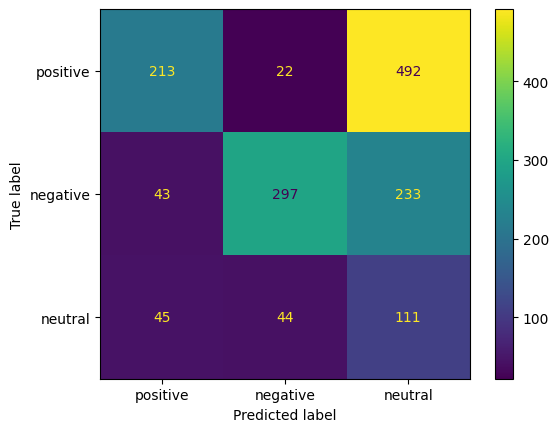

In [687]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=["positive","negative" ,"neutral"])
disp.plot()
plt.show()

In [688]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import collections
from collections import Counter
words_list=[]
for i in range(len(pt)):
  tok = word_tokenize(pt[i])
  words_list +=tok
counter=collections.Counter(words_list)
print(counter)

Counter({'बीजेपी': 403, 'कोरोना': 301, 'राम': 210, 'कांग्रेस': 181, 'मोदी': 164, 'देश': 159, 'सरकार': 155, ',': 150, 'अब': 121, 'नही': 120, 'रही': 119, 'क्या': 115, 'आईपीएल': 90, 'आज': 80, 'लोग': 79, 'चुनाव': 78, 'बंगाल': 70, 'हार्दिक': 67, 'वो': 63, 'हम': 63, 'सिर्फ': 60, 'जनता': 60, 'लोगों': 59, 'बार': 59, 'बात': 58, 'जय': 58, 'चाहिए': 58, 'क्यों': 57, 'नवमी': 56, '!': 54, 'काम': 54, 'दिन': 53, 'हर': 53, 'सब': 53, '?': 52, 'नाम': 50, 'है': 49, 'साल': 48, 'भारत': 48, 'तुम': 47, 'शुभकामनाएं': 46, 'नेता': 45, 'दे': 44, 'आ': 44, 'रामनवमी': 43, 'ज्यादा': 40, 'गए': 40, 'ipl2021': 40, 'गई': 39, 'दिल्ली': 39, 'BJP': 39, 'ipl': 39, 'लोगो': 36, 'समय': 36, 'होगा': 35, 'पार्टी': 35, 'बंद': 34, 'राम_नवमी': 34, 'वोट': 33, 'बड़ा': 33, 'भाई': 32, 'बॉलीवुड': 32, 'वैक्सीन': 31, 'मीडिया': 31, 'ले': 31, 'राज्य': 31, 'करो': 31, 'आपके': 31, ':': 31, 'मंत्री': 30, 'रैली': 30, 'लेकर': 30, 'पता': 30, 'सिंह': 30, 'प्रदेश': 30, 'EXCLUSIVE': 30, 'बड़ी': 29, 'अस्पताल': 29, 'via': 29, 'आईपीएल2021': 29, 'भगवान': 2

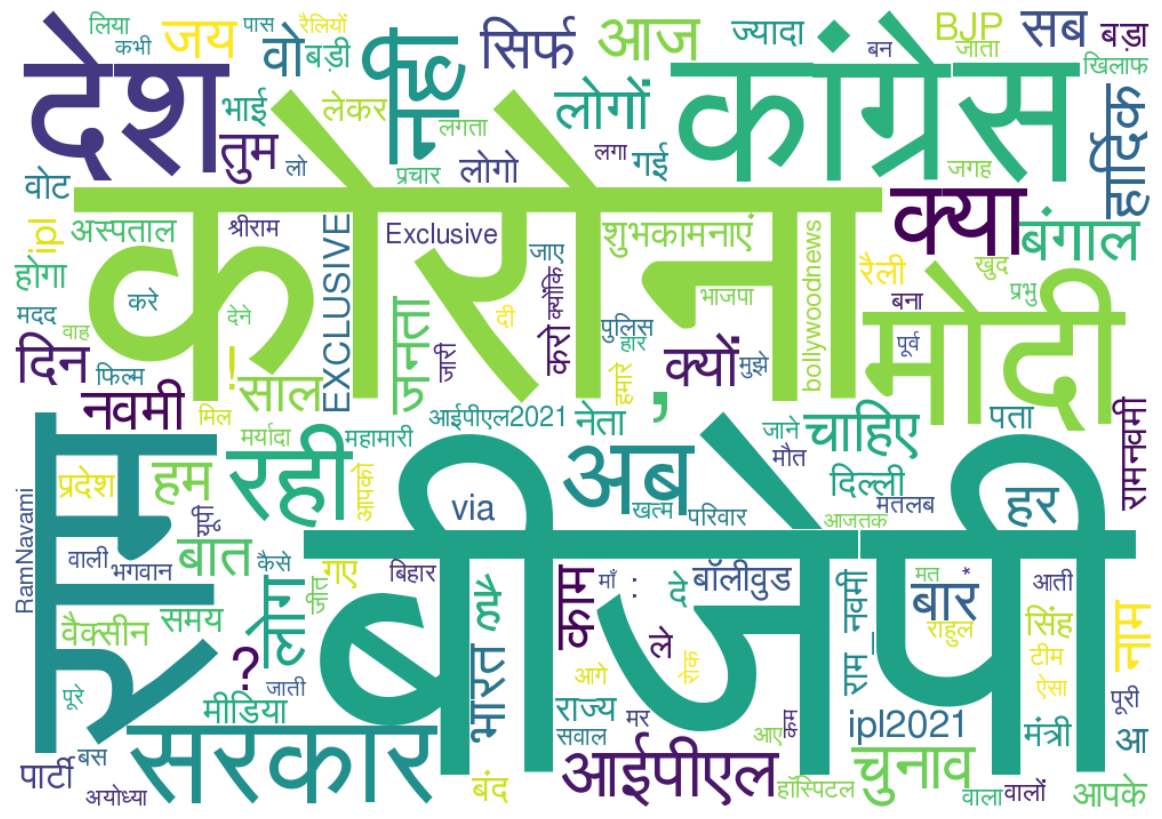

In [689]:
font = "gargi.ttf"

dictionary=Counter(words_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)
# plot the WordCloud image
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [694]:
polarity_total = []
neg_vot=[]
pos_vot=[]
def sentiment2(text):
    words = word_tokenize(text)
    votes = []
    pos_polarity = 0
    neg_polarity = 0
    neu_polarity = 0
    allowed_words = ['a','v','r','n']#adverbs, nouns, adjective, verb
    for word in words:
        if word in words_dict_votes:
            pos, neg, neu = words_dict_votes[word]
            if pos > neg:
              votes.append(1)
            elif neg > pos:
              votes.append(0)
            elif neg == True:
              neu_polarity+=1


    pos_votes_count = votes.count(1)
    neg_votes_count = votes.count(0)

    if pos_votes_count > neg_votes_count:
        return 'positive'
    elif neg_votes_count > pos_votes_count:
        return 'negative'
    else:
       return sentiment(text)



In [695]:
s2=[]
for i in pt:
  s2.append(sentiment2(i))

In [696]:
df2

,Preprocessed_Tweets,sentiment
0,देश बड़ी बकवास नाउम्मीद निराशा Rafool NakliGan...,negative
1,हा लोगो शौक चढ़ा सिलेंडर रखने बीजेपी सिलेंडर इ...,neutral
2,बात बोल हु आने चुनाव लोगो समझना होगा AAP बस वो...,negative
3,"आरक्षण विरोधी हूं किंतु वोट बीजेपी दूंगा, आरक्...",neutral
4,राहुल बीजेपी,neutral
...,...,...
1495,उससे कहानी अलग दिशा भटक जाती,neutral
1496,जम्मू कश्मीर बाढ़ PM लिया हालात जायजा करोड़ रु...,positive
1497,केन्द्र सरकार बिहार विशेष पैकेज करोड़ रुपये आर...,positive
1498,मेरी आँखों जादू तुम वाक़िफ़ हम जीना सीखा देते ...,positive


In [697]:
df2['sentiment2']=s2
df2['actual_sentiment']=df['Sentiment']
df2['actual_tweet']=df['Original_Tweets']

In [698]:
df2.tail()

,Preprocessed_Tweets,sentiment,sentiment2,actual_sentiment,actual_tweet
1495,उससे कहानी अलग दिशा भटक जाती,neutral,negative,negative,उससे कहानी एक अलग दिशा में भटक जाती है
1496,जम्मू कश्मीर बाढ़ PM लिया हालात जायजा करोड़ रु...,positive,positive,positive,जम्मू-कश्मीर बाढ़ : PM ने लिया हालात का जायजा ...
1497,केन्द्र सरकार बिहार विशेष पैकेज करोड़ रुपये आर...,positive,positive,positive,केन्द्र सरकार ने बिहार को दिया विशेष पैकेज 120...
1498,मेरी आँखों जादू तुम वाक़िफ़ हम जीना सीखा देते ...,positive,positive,positive,मेरी आँखों के जादू से तुम अभी वाक़िफ़ नहीं हो ...
1499,इस्लाम दहशतगर्दों जगह जौनपुर जिले वरिष्ठ समाजस...,positive,positive,positive,इस्लाम में दहशतगर्दों की कोई जगह नहीं |: जौनपु...


In [699]:
df2.head()

,Preprocessed_Tweets,sentiment,sentiment2,actual_sentiment,actual_tweet
0,देश बड़ी बकवास नाउम्मीद निराशा Rafool NakliGan...,negative,negative,negative,['@AkhileshPSingh @RahulGandhi देश की सबसे बड़...
1,हा लोगो शौक चढ़ा सिलेंडर रखने बीजेपी सिलेंडर इ...,neutral,positive,positive,'@Abhiemanyu @Ishutyagi91 हा लोगो को #शौक चढ़...
2,बात बोल हु आने चुनाव लोगो समझना होगा AAP बस वो...,negative,positive,negative,'एक बात बोल रहा हु आने वाले चुनाव में लोगो को...
3,"आरक्षण विरोधी हूं किंतु वोट बीजेपी दूंगा, आरक्...",neutral,negative,negative,'मैं #आरक्षण विरोधी हूं किंतु वोट #बीजेपी को ...
4,राहुल बीजेपी,neutral,neutral,positive,"'@INCMP 😂😂😂 राहुल हैं तो #बीजेपी है।',"


In [700]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [701]:
# df2.to_excel('/content/drive/MyDrive/Research Paper/tweetset/comparison.xlsx')

In [702]:
pred_y = []
actual_y = []
pred_y=df2['sentiment2'].tolist()
actual_y=df['Sentiment'].tolist()
print(accuracy_score(actual_y, pred_y) * 100)

65.0


In [703]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual_y, pred_y, labels=["positive","negative"])

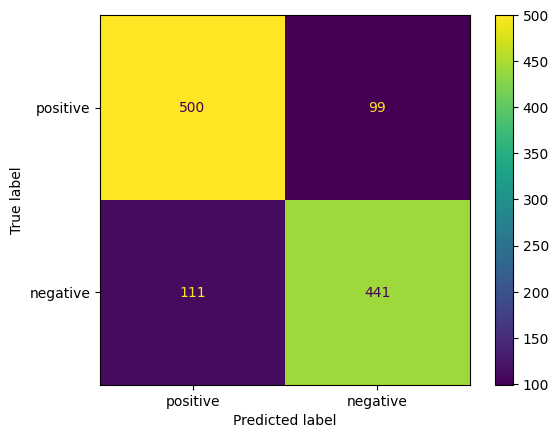

In [704]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["positive","negative"])
disp.plot()
plt.show()

In [705]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(actual_y, pred_y, labels=["positive","negative","neutral"])

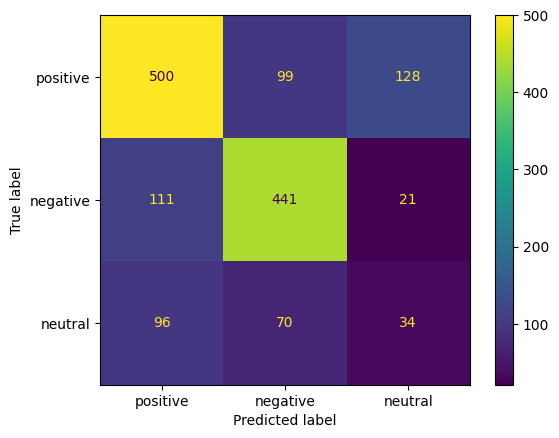

In [706]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm3,
                               display_labels=["positive","negative","neutral"])
disp.plot()
plt.show()

In [707]:
df2.head()

,Preprocessed_Tweets,sentiment,sentiment2,actual_sentiment,actual_tweet
0,देश बड़ी बकवास नाउम्मीद निराशा Rafool NakliGan...,negative,negative,negative,['@AkhileshPSingh @RahulGandhi देश की सबसे बड़...
1,हा लोगो शौक चढ़ा सिलेंडर रखने बीजेपी सिलेंडर इ...,neutral,positive,positive,'@Abhiemanyu @Ishutyagi91 हा लोगो को #शौक चढ़...
2,बात बोल हु आने चुनाव लोगो समझना होगा AAP बस वो...,negative,positive,negative,'एक बात बोल रहा हु आने वाले चुनाव में लोगो को...
3,"आरक्षण विरोधी हूं किंतु वोट बीजेपी दूंगा, आरक्...",neutral,negative,negative,'मैं #आरक्षण विरोधी हूं किंतु वोट #बीजेपी को ...
4,राहुल बीजेपी,neutral,neutral,positive,"'@INCMP 😂😂😂 राहुल हैं तो #बीजेपी है।',"


In [708]:
#lexicon-based
df3 = pd.concat([df2['Preprocessed_Tweets'],df2['sentiment'], df2['actual_sentiment']], axis=1)
df4 = df3.rename(columns={"sentiment": "Predicted_Sentiment", "actual_sentiment": "Actual_Sentiment", "Preprocessed_Tweets": "Preprocessed_Tweets"})
df4.head(10)

,Preprocessed_Tweets,Predicted_Sentiment,Actual_Sentiment
0,देश बड़ी बकवास नाउम्मीद निराशा Rafool NakliGan...,negative,negative
1,हा लोगो शौक चढ़ा सिलेंडर रखने बीजेपी सिलेंडर इ...,neutral,positive
2,बात बोल हु आने चुनाव लोगो समझना होगा AAP बस वो...,negative,negative
3,"आरक्षण विरोधी हूं किंतु वोट बीजेपी दूंगा, आरक्...",neutral,negative
4,राहुल बीजेपी,neutral,positive
5,ModiResignOrRepeal बीजेपी मित्रो वक्त देश माफी...,neutral,positive
6,मई पहला प्रश्नपत्रकार कांग्रेस सीट जीत क्यों म...,negative,negative
7,उत्सव सुने बीजेपी कार्यकाल उत्सव नाम जुड़ गाया...,neutral,positive
8,वो चुनावआयोग नेताओं नाचता शेषण चुनाव आयुक्त उस...,neutral,positive
9,अभिव्यक्ति आजादी क्या सिर्फ दलितों दी गई मर्जी...,neutral,positive


In [709]:
#improved lexicon-based
df3 = pd.concat([df2['Preprocessed_Tweets'],df2['sentiment2'], df2['actual_sentiment']], axis=1)
df4 = df3.rename(columns={"sentiment2": "Predicted_Sentiment", "actual_sentiment": "Actual_Sentiment", "Preprocessed_Tweets": "Preprocessed_Tweets"})
df4.head(10)

,Preprocessed_Tweets,Predicted_Sentiment,Actual_Sentiment
0,देश बड़ी बकवास नाउम्मीद निराशा Rafool NakliGan...,negative,negative
1,हा लोगो शौक चढ़ा सिलेंडर रखने बीजेपी सिलेंडर इ...,positive,positive
2,बात बोल हु आने चुनाव लोगो समझना होगा AAP बस वो...,positive,negative
3,"आरक्षण विरोधी हूं किंतु वोट बीजेपी दूंगा, आरक्...",negative,negative
4,राहुल बीजेपी,neutral,positive
5,ModiResignOrRepeal बीजेपी मित्रो वक्त देश माफी...,negative,positive
6,मई पहला प्रश्नपत्रकार कांग्रेस सीट जीत क्यों म...,positive,negative
7,उत्सव सुने बीजेपी कार्यकाल उत्सव नाम जुड़ गाया...,positive,positive
8,वो चुनावआयोग नेताओं नाचता शेषण चुनाव आयुक्त उस...,positive,positive
9,अभिव्यक्ति आजादी क्या सिर्फ दलितों दी गई मर्जी...,positive,positive
